In [2]:
!pip install psycopg2
import psycopg2 as psycopg2
import pandas as pd

In [5]:
host = "np-ado-asg2-jairzhou.postgres.database.azure.com"
port = 5432
dbname = "postgres"
username = "admin1@np-ado-asg2-jairzhou"
pwd = "jair_zhou1"

table = "bank_churn"

In [6]:
with psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd)) as conn:
    sql = "select * from {};".format(table)
    df = pd.read_sql_query(sql, conn)

In [7]:
df.head()

,age,exited,gender,tenure,balance,surname,geography,hascrcard,rownumber,customerid,creditscore,numofproducts,isactivemember,estimatedsalary,_airbyte_ab_id,_airbyte_emitted_at,_airbyte_normalized_at,_airbyte_bank_churn_hashid
0,42.0,1.0,Female,2.0,0.00,Hargrave,France,1.0,1.0,15634602.0,619.0,1.0,1.0,101348.88,bda1bd8a-7a65-4650-9f31-c38d96af623f,2023-01-24 13:21:34+00:00,2023-01-24 13:21:55.657002+00:00,ce5e4b8acfefb76eac9d73c2afac0be3
1,41.0,0.0,Female,1.0,83807.86,Hill,Spain,0.0,2.0,15647311.0,608.0,1.0,1.0,112542.58,a4b44bbd-b815-45d9-b3d4-4fdf37f4b507,2023-01-24 13:21:34+00:00,2023-01-24 13:21:55.657002+00:00,3d43f62b810659a2a04b79644382b5bf
2,42.0,1.0,Female,8.0,159660.80,Onio,France,1.0,3.0,15619304.0,502.0,3.0,0.0,113931.57,c49ce369-67ab-4081-b9d8-63d1c49e6876,2023-01-24 13:21:34+00:00,2023-01-24 13:21:55.657002+00:00,a2c6ffd626f45cb40a7b889e54fb44cf
3,39.0,0.0,Female,1.0,0.00,Boni,France,0.0,4.0,15701354.0,699.0,2.0,0.0,93826.63,7a0abdb3-980d-4ce4-b57d-f92f043adafb,2023-01-24 13:21:34+00:00,2023-01-24 13:21:55.657002+00:00,8688c9fbc46f93e5466fcfd33c7007d6
4,43.0,0.0,Female,2.0,125510.82,Mitchell,Spain,1.0,5.0,15737888.0,850.0,1.0,1.0,79084.10,f3d0121b-debf-4d95-b937-de08a12b1a66,2023-01-24 13:21:34+00:00,2023-01-24 13:21:55.657002+00:00,da83e57ab57604c6d6d9fa837e6c23c9


In [8]:
# drop irrelevant data
df.drop(list(df.filter(regex = '_airbyte_')), axis = 1, inplace = True)
df.head()

,age,exited,gender,tenure,balance,surname,geography,hascrcard,rownumber,customerid,creditscore,numofproducts,isactivemember,estimatedsalary
0,42.0,1.0,Female,2.0,0.00,Hargrave,France,1.0,1.0,15634602.0,619.0,1.0,1.0,101348.88
1,41.0,0.0,Female,1.0,83807.86,Hill,Spain,0.0,2.0,15647311.0,608.0,1.0,1.0,112542.58
2,42.0,1.0,Female,8.0,159660.80,Onio,France,1.0,3.0,15619304.0,502.0,3.0,0.0,113931.57
3,39.0,0.0,Female,1.0,0.00,Boni,France,0.0,4.0,15701354.0,699.0,2.0,0.0,93826.63
4,43.0,0.0,Female,2.0,125510.82,Mitchell,Spain,1.0,5.0,15737888.0,850.0,1.0,1.0,79084.10


In [9]:
df.isnull().sum()

age                0
exited             0
gender             0
tenure             0
balance            0
surname            0
geography          0
hascrcard          0
rownumber          0
customerid         0
creditscore        0
numofproducts      0
isactivemember     0
estimatedsalary    0
dtype: int64

In [10]:
# as of now fill all NaNs w/ 0
df = df.fillna(0)
df = df.drop(columns = ["customerid","surname"])

In [11]:
df.head()

,age,exited,gender,tenure,balance,geography,hascrcard,rownumber,creditscore,numofproducts,isactivemember,estimatedsalary
0,42.0,1.0,Female,2.0,0.00,France,1.0,1.0,619.0,1.0,1.0,101348.88
1,41.0,0.0,Female,1.0,83807.86,Spain,0.0,2.0,608.0,1.0,1.0,112542.58
2,42.0,1.0,Female,8.0,159660.80,France,1.0,3.0,502.0,3.0,0.0,113931.57
3,39.0,0.0,Female,1.0,0.00,France,0.0,4.0,699.0,2.0,0.0,93826.63
4,43.0,0.0,Female,2.0,125510.82,Spain,1.0,5.0,850.0,1.0,1.0,79084.10


In [12]:
df.isnull().sum()

age                0
exited             0
gender             0
tenure             0
balance            0
geography          0
hascrcard          0
rownumber          0
creditscore        0
numofproducts      0
isactivemember     0
estimatedsalary    0
dtype: int64

In [13]:
cat_cols =  [c for c in df.columns if df[c].dtypes=="O"]
for c in cat_cols:
    print(c)
    print(df[c].unique())

gender
['Female' 'Male']
geography
['France' 'Spain' 'Germany']


In [14]:
ordinal_mapping = {
    "France" : 0,
    "Spain" : 1,
    "Germany" :2
}

ordinal_mapping
df["geography"] = df['geography'].map(ordinal_mapping)

In [15]:
ordinal_mapping = {
    "Female" : 0,
    "Male" : 1
   
}

ordinal_mapping
df["gender"] = df['gender'].map(ordinal_mapping)

In [16]:
df.head()

,age,exited,gender,tenure,balance,geography,hascrcard,rownumber,creditscore,numofproducts,isactivemember,estimatedsalary
0,42.0,1.0,0,2.0,0.00,0,1.0,1.0,619.0,1.0,1.0,101348.88
1,41.0,0.0,0,1.0,83807.86,1,0.0,2.0,608.0,1.0,1.0,112542.58
2,42.0,1.0,0,8.0,159660.80,0,1.0,3.0,502.0,3.0,0.0,113931.57
3,39.0,0.0,0,1.0,0.00,0,0.0,4.0,699.0,2.0,0.0,93826.63
4,43.0,0.0,0,2.0,125510.82,1,1.0,5.0,850.0,1.0,1.0,79084.10


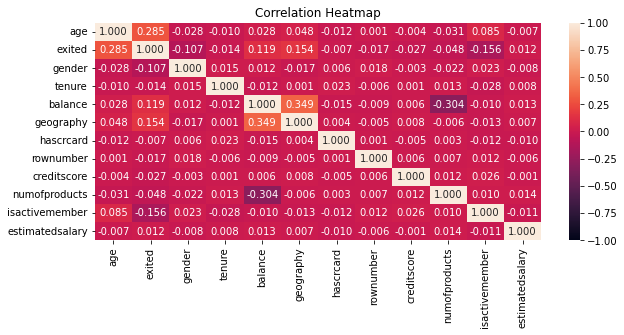

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10,4))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,fmt='.3f')
plt.show()

In [18]:
df = df.drop(columns = ["hascrcard","estimatedsalary","rownumber","tenure","creditscore"])

In [19]:
# modelling

In [20]:
from sklearn.model_selection import train_test_split
xtra,xtes,ytra,ytes = train_test_split(df.drop("exited", axis = 1),df["exited"], test_size = 0.2,
                                      random_state = 404)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(random_state = 404)

param_grid = { 
    'n_estimators': [10,20,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [22]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(xtra,ytra)

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=404),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]})

In [23]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [24]:
# yall MUST change here

In [25]:
rfm = RandomForestClassifier(criterion = "entropy", max_depth = 8,
                             max_features = "auto", n_estimators = 30,
                             random_state = 404)

rfm.fit(xtra,ytra)

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=30, random_state=404)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

y_train_preds = rfm.predict(xtra)
y_test_preds = rfm.predict(xtes)

In [27]:
print(classification_report(ytes, y_test_preds))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1577
         1.0       0.83      0.48      0.61       423

    accuracy                           0.87      2000
   macro avg       0.85      0.73      0.76      2000
weighted avg       0.87      0.87      0.85      2000



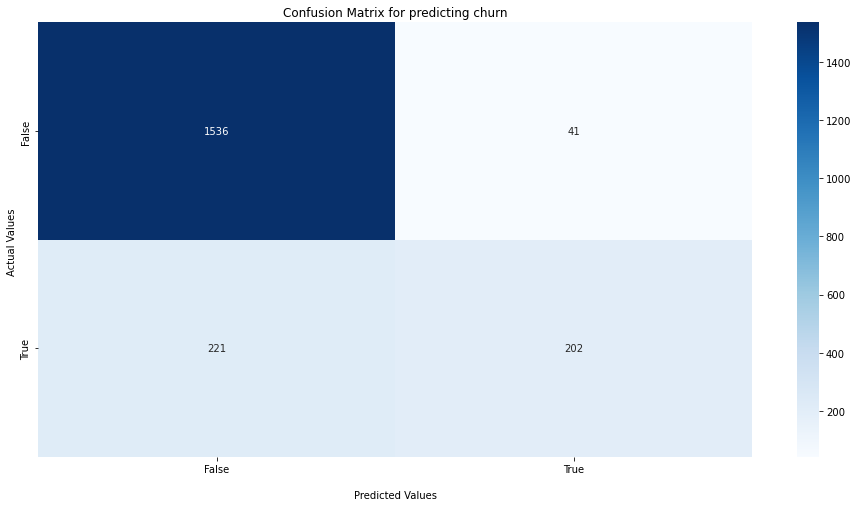

In [28]:
cf_matrix = confusion_matrix(ytes, y_test_preds)

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,8))

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)

ax.set_title('Confusion Matrix for predicting churn');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [29]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10,15], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7,8]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(xtra, ytra) # 

print(gs.best_score_)
print(gs.best_params_)

0.86075
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 16}
